Code erstellt nach Tutorial, identsiche Codezeilen nach:
Parashar, A. (2020, 13. Oktober). Sentiment Analysis web app using NLTK and Heroku. medium. https://medium.com/pythoneers/sentiment-analysis-web-app-using-nltk-and-heroku-96ccd37c44ef

In [10]:
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test

# Random Forest 

Hier wird ein Random Forest Modell erstellt und mit Daten trainiert. Anschliessend wird die Genauigkeit des Modells geprüft.


In [2]:
RFC = RandomForestClassifier()
rfcModel = RFC.fit(X_train, y_train)
print(rfcModel.score(X_test,y_test))

0.8323


## Prediction - mit Random Forest als Trainingsmodell


In [4]:
y_pred=rfcModel.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), np.array(y_test).reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 0]
 ...
 [1 1]
 [0 1]
 [0 0]]


## Modell bewerten - mittels Confusion Matrix und Accuracy Score

[[4212  823]
 [ 854 4111]] 83.23


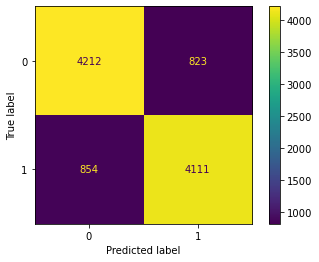

In [11]:
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)
print(cm,score*100)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

# Speichern des Modells - das trainierte Modell wird als Datei gespeichert

In [6]:
# Save trained model to file
pickle.dump(rfcModel, open("rfc_review.pkl", "wb"))

## Erneutes Laden des Modells in einer Variable

In [7]:
loaded_model = pickle.load(open("rfc_review.pkl", "rb"))
y_pred_new = loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

del X_train
del X_test
del y_train
del y_test